In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
import mglearn
import sklearn

from sklearn.datasets import make_blobs 
from sklearn.datasets import load_breast_cancer 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
from sklearn.svm import LinearSVC

/home/alex/3rd/py-venv/lib/python3.7/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
/home/alex/3rd/py-venv/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


### 2.3.3 线性模型
线性模型利用输入特征的线性函数(linear function)进行预测。

#### 2.3.3.1 用于回归的线性模型
对于回归问题，线性模型预测的一般公式如下：

$\hat{y} = w[0]*x[0]+w[0]*x[0]+...+w[p]*x[p]+b$

这里$x[0]$到$x[p]$表示单个数据点的特征(本例中特征个数为$p+1$)，$w$和$b$是学习模型的参数，$\hat{y}$是模型的预测结果。对于单一特征的数据集，公式如下：

$\hat{y} = w[0]*x[0]+b$

这就是高中数学里的直线方程。这里$w[0]$是斜率，$b$是$y$轴偏移。对于有更多特征的数据集，$w$包含沿每个特征坐标轴的斜率。或者，你也可以将预测的响应值看作输入特征的加权求和，权重由$w$的元素给出(可以取负值)。

下列代码可以在一维wave数据集上学习参数$w[0]$和$b$：

w[0]: 0.393906  b: -0.031804


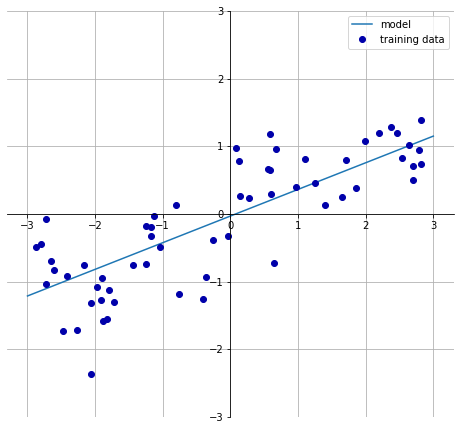

In [2]:
mglearn.plots.plot_linear_regression_wave()
plt.show()

用于回归的线性模型可以表示为这样的回归模型：对单一特征的预测结果是一条直线，两个特征时是一个平面，或者在更高维度时是一个超平面。

如果将直线的预测结果与KNeighborsRegressor的预测结果进行比较，你会发现直线的预测能力非常受限。似乎数据的所有细节都丢失了。从某种意义上来说，这种说法是正确的。假设目标$y$是特征的线性组合，这是一个非常强的（也有点不现实的）假设。但观察一维数据得出的观点有些片面。**对于有多个特征的数据集而言，线性模型可以非常强大。特别地，如果特征数量大于训练数据点的数量，任何目标$y$都可以（在训练集上）用线性函数完美拟合**。

有许多不同的线性回归模型。这些模型之间的区别在于如何从训练数据中学习参数$w$和$b$，以及如何控制模型复杂度。

#### 2.3.3.2 线性回归(又名普通最小二乘法)
线性回归，或者普通最小二乘法（ordinary least squares，OLS），是回归问题最简单也最经典的线性方法。线性回归寻找参数$w$和$b$，使得对训练集的预测值与真实的回归目标值$y$之间的均方误差最小。均方误差(mean squared error, MSE)是预测值与真实值之差的平方和除以样本数。线性回归没有参数，这是一个优点，但也因此无法控制模型的复杂度。

> 最小二乘法的原理和公式参考：https://zh.wikipedia.org/wiki/最小二乘法

例子：

In [3]:
X, y = mglearn.datasets.make_wave(n_samples=60)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

lr = sklearn.linear_model.LinearRegression().fit(X_train, y_train)

# “斜率”参数(w，即权重)保存在coef_属性中
print("lr.coef_: {}".format(lr.coef_))
# 偏移或截距(b)保存在intercept_属性中
print("lr.intercept_: {}".format(lr.intercept_))
# 性能
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

lr.coef_: [0.39390555]
lr.intercept_: -0.031804343026759746
Training set score: 0.67
Test set score: 0.66


> 你可能注意到了coef\_和intercept\_结尾处的下划线。scikit-learn总是将从训练数据中得出的值保存在以下划线结尾的属性中。这是为了将其与用户设置的参数区分开。

$R^2$约为0.66，这个结果不是很好，但我们可以看到，训练集和测试集上的分数非常接近。这说明可能存在欠拟合，而不是过拟合。对于这个一维数据集来说，过拟合的风险很小，因为模型非常简单（或受限）。然而，对于更高维的数据集（即有大量特征的数据集），线性模型将变得更加强大，过拟合的可能性也会变大。

我们使用更复杂的数据集测试LinearRegression。波士顿房价数据集有506个样本和105个导出特征：

In [4]:
X, y = mglearn.datasets.load_extended_boston()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = sklearn.linear_model.LinearRegression().fit(X_train, y_train)

print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

Training set score: 0.95
Test set score: 0.61


训练集和测试集之间的性能差异是过拟合的明显标志，因此我们应该试图找到一个可以控制复杂度的模型。标准线性回归最常用的替代方法之一就是岭回归（ridge regression）。

#### 2.3.3.3 岭回归
岭回归也是一种用于回归的线性模型，因此它的预测公式与普通最小二乘法相同。但在岭回归中，对系数$w$的选择不仅要在训练数据上得到好的预测结果，而且还要拟合附加约束。我们还希望系数尽量小。换句话说，$w$的所有元素都应接近于$0$。直观上来看，这意味着每个特征对输出的影响应尽可能小（即斜率很小），同时仍给出很好的预测结果。这种约束是所谓`正则化(regularization)`的一个例子。正则化是指对模型做显式约束，以避免过拟合。岭回归用到`L2 正则化`。

岭回归在`linear_model.Ridge`中实现：

In [5]:
ridge = sklearn.linear_model.Ridge().fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge.score(X_test, y_test)))

Training set score: 0.89
Test set score: 0.75


可以看出，Ridge在训练集上的分数要低于LinearRegression，但在测试集上的分数更高。这和我们的预期一致，Ridge是一种约束更强的模型，所以更不容易过拟合。*复杂度更小的模型意味着在训练集上的性能更差，但泛化性能更好*。

Ridge模型在模型的简单性（系数都接近于0）与训练集性能之间做出权衡。简单性和训练集性能二者对于模型的重要程度可以由用户通过设置alpha参数来指定，默认参数alpha=1.0。alpha的最佳设定值取决于用到的具体数据集。增大alpha会使得系数更加趋向于0，从而降低训练集性能，但可能会提高泛化性能：

In [6]:
ridge10 = sklearn.linear_model.Ridge(alpha=10).fit(X_train, y_train) 
print("Training set score: {:.2f}".format(ridge10.score(X_train, y_train))) 
print("Test set score: {:.2f}".format(ridge10.score(X_test, y_test)))

Training set score: 0.79
Test set score: 0.64


减小alpha可以让系数受到的限制更小。对于非常小的alpha值，系数几乎没有受到限制，我们得到一个与LinearRegression类似的模型：

In [7]:
ridge01 = sklearn.linear_model.Ridge(alpha=0.1).fit(X_train, y_train) 
print("Training set score: {:.2f}".format(ridge01.score(X_train, y_train))) 
print("Test set score: {:.2f}".format(ridge01.score(X_test, y_test)))

Training set score: 0.93
Test set score: 0.77


我们可以查看alpha取不同值时模型的coef\_属性，定性理解alpha参数是如何改变模型的。更大的alpha表示约束更强的模型，所以我们预计大alpha对应的coef_元素比小alpha对应的coef_元素要小：

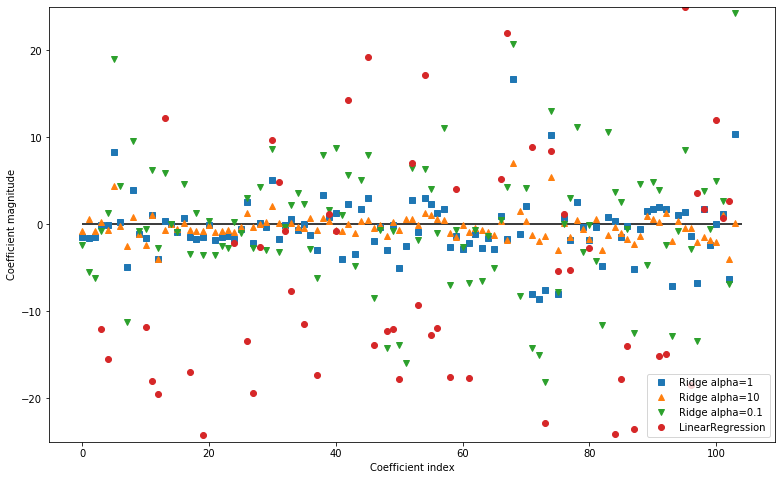

In [8]:
fig = plt.gcf()
fig.set_size_inches(13, 8)

plt.plot(ridge.coef_, 's', label="Ridge alpha=1") 
plt.plot(ridge10.coef_, '^', label="Ridge alpha=10") 
plt.plot(ridge01.coef_, 'v', label="Ridge alpha=0.1")
plt.plot(lr.coef_, 'o', label="LinearRegression") 
plt.xlabel("Coefficient index") 
plt.ylabel("Coefficient magnitude") 
plt.hlines(0, 0, len(lr.coef_)) 
plt.ylim(-25, 25)
plt.legend()
plt.show()

还有一种方法可以用来理解正则化的影响，就是固定alpha值，但改变训练数据量。我们对波士顿房价数据集做二次抽样，并在数据量逐渐增加的子数据集上分 别对`LinearRegression`和`Ridge(alpha=1)`两个模型进行评估（将模型性能作为数据集大小的函数进行绘图，这样的图像叫作学习曲线 ）：

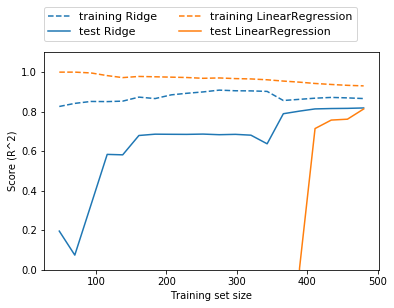

In [9]:
mglearn.plots.plot_ridge_n_samples()
plt.show()

**以下内容非常重要**：
> 正如所预计的那样，无论是岭回归还是线性回归，训练分数都要高于测试分数。由于岭回归是正则化的，因此它的训练分数要整体低于线性回归。但岭回归的测试分数要更高，特别是对较小的子数据集。如果少于400个数据点，线性回归学不到任何内容。随着模型可用的数据越来越多，两个模型的性能都在提升，最终线性回归的性能追上了岭回归。这里要记住的是，如果有足够多的训练数据，正则化变得不那么重要，并且岭回归和线性回归将具有相同的性能（在这个例子中，二者相同恰好发生在整个数据集的情况下，这只是一个巧合）。图中还有一个有趣之处，就是线性回归的训练性能在下降。如果添加更多数据，模型将更加难以过拟合或记住所有的数据。

#### 2.3.3.4 Lasso回归
Lasso回归使用$L_1$正则化使某些系数刚好为$0$，这说明某些特征被模型完全忽略。这可以看作是一种自动化的特征选择。某些系数刚好为$0$，这样模型更容易解释，也可以呈现模型最重要的特征。

In [10]:
lasso = sklearn.linear_model.Lasso().fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso.score(X_train, y_train))) 
print("Test set score: {:.2f}".format(lasso.score(X_test, y_test))) 
print("Number of features used: {}".format(np.sum(lasso.coef_ != 0)))

Training set score: 0.29
Test set score: 0.21
Number of features used: 4


如你所见，Lasso在训练集与测试集上的表现都很差，这表示存在欠拟合。我们发现模型只用到了105个特征中的4个。我们通过调节Lasso的正则化参数$alpha$可以控制系数趋向于0的强度。alpha默认值为1，为了降低欠拟合，我们尝试减小alpha；同时，我们还需要增加max_iter的值（运行迭代的最大次数）：

In [11]:
# 我们增大max_iter的值，否则模型会警告我们，说应该增大max_iter 
lasso001 = sklearn.linear_model.Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train) 
print("Training set score: {:.2f}".format(lasso001.score(X_train, y_train))) 
print("Test set score: {:.2f}".format(lasso001.score(X_test, y_test))) 
print("Number of features used: {}".format(np.sum(lasso001.coef_ != 0)))

Training set score: 0.90
Test set score: 0.77
Number of features used: 33


alpha值变小，我们可以拟合一个更复杂的模型。如果把alpha设得太小，就有可能会出现过拟合：

In [12]:
lasso00001 = sklearn.linear_model.Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train) 
print("Training set score: {:.2f}".format(lasso00001.score(X_train, y_train))) 
print("Test set score: {:.2f}".format(lasso00001.score(X_test, y_test))) 
print("Number of features used: {}".format(np.sum(lasso00001.coef_ != 0)))

Training set score: 0.95
Test set score: 0.64
Number of features used: 96


针对不同的正则化参数绘制图形如下：

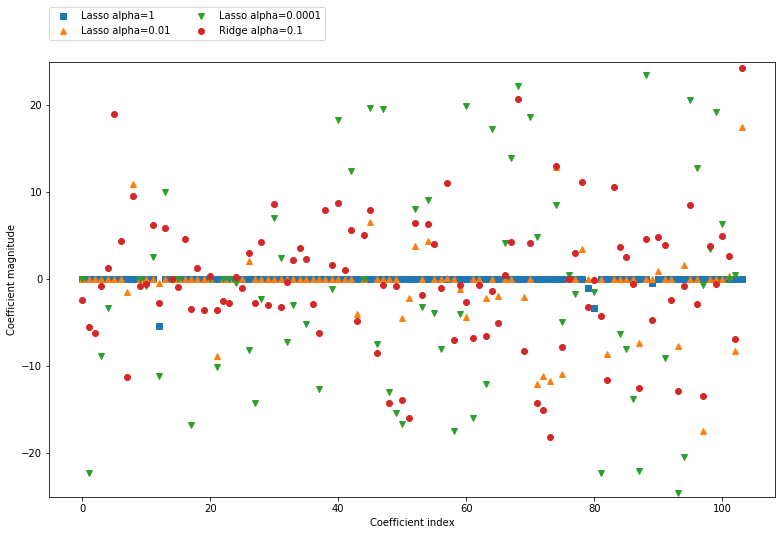

In [13]:
fig = plt.gcf()
fig.set_size_inches(13, 8)

plt.plot(lasso.coef_, 's', label="Lasso alpha=1") 
plt.plot(lasso001.coef_, '^', label="Lasso alpha=0.01") 
plt.plot(lasso00001.coef_, 'v', label="Lasso alpha=0.0001")

plt.plot(ridge01.coef_, 'o', label="Ridge alpha=0.1") 
plt.legend(ncol=2, loc=(0, 1.05)) 
plt.ylim(-25, 25) 
plt.xlabel("Coefficient index") 
plt.ylabel("Coefficient magnitude")
plt.show()

在alpha=1时绝大部分系数都是0，而且其他系数也都很小；将alpha减小至0.01，大部分特征等于0；alpha=0.0001时，得到正则化很弱的模型，大部分系数都不为0，并且还很大。为了便于比较，图中用圆形表示Ridge的最佳结果。alpha=0.1的Ridge模型的预测性能与alpha=0.01的Lasso模型类似，但Ridge模型的所有系数都不为0。

> *在实践中，在两个模型中一般首选岭回归。但如果特征很多，你认为只有其中几个是重要的，那么选择Lasso可能更好。如果你想要一个容易解释的模型，Lasso可以给出更容易理解的模型，因为它只选择了一部分输入特征。scikit-learn还提供了ElasticNet类，结合了Lasso和Ridge的惩罚项。在实践中，这种结合的效果最好，不过代价是要调节两个参数：一个用于$L_1$正则化，一个用于$L_2$正则化。*

#### 2.3.3.5 用于分类的线性模型
线性模型也可以用于分类。对于二分类问题，可以用下面的公式预测：

$\hat{y} = w[0]*x[0]+w[0]*x[0]+...+w[p]*x[p]+b > 0$

如果函数值小于0， 我们就预测类别-1；如果函数值大于0，我们就预测类别+1。

对于用于回归的线性模型，输出$\hat{y}$是特征的线性函数，是直线平面或超平面；对于用于分类的线性模型，`决策边界`是输入的线性函数。换句话说，二元线性分类器是利用直线、平面或超平面来分开两个类别的分类器。

**学习线性模型有很多种算法。这些算法的区别在于以下两点**：
+ 系数和截距的特定组合对训练数据拟合好坏的度量方法
+ 是否使用正则化，以及使用哪种正则化方法

不同的算法使用不同的方法来度量“对训练集拟合好坏”。由于数学上的技术原因，不可能调节$w$和$b$使得算法产生的误分类数量最少。对于我们的目的，以及对于许多应用而言，上面第一点（称为损失函数）的选择并不重要。

最常见的两种线性分类算法是Logistic Regression和Linear Support Vector Machine。前者在`linear_model.LogisticRegression`中实现， 后者在`svm.LinearSVC`（SVC代表支持向量分类器）中实现。 **虽然Logistic Regression的名字中含有回归，但它是一种分类算法，并不是回归算法， 不应与LinearRegression混淆**。

我们可以将LogisticRegression和LinearSVC模型应用到forge数据集上， 并将线性模型找到的决策边界可视化 ：

/home/alex/3rd/py-venv/lib/python3.7/site-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)
/home/alex/3rd/py-venv/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/alex/3rd/py-venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


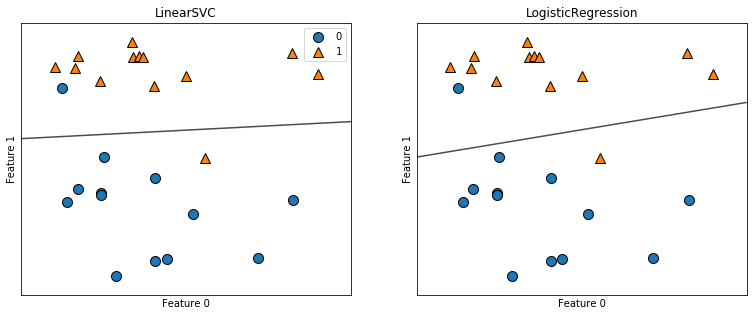

In [14]:
X, y = mglearn.datasets.make_forge()
fig, axes = plt.subplots(1, 2, figsize=(10, 3))
fig.set_size_inches(13, 5)

for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf = model.fit(X, y) 
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5, ax=ax, alpha=.7) 
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax) 
    ax.set_title("{}".format(clf.__class__.__name__)) 
    ax.set_xlabel("Feature 0") 
    ax.set_ylabel("Feature 1") 

axes[0].legend()
plt.show()

两个模型得到了相似的决策边界，两个模型都默认使用$L_2$正则化。两个模型决定正则化强度的参数叫C。C越大，正则化越弱。即如果C值较大，那么LogisticRegression和LinearSVC将尽可能将训练集拟合到最好，而如果C值较小，那么模型更强调使系数向量$w$接近于0。

参数C的作用还有另一个有趣之处。较小的C值让算法尽量适应“大多数”数据点，较大的C值更强调每个数据点都分类正确的重要性。

下面是使用LinearSVC演示C的作用：

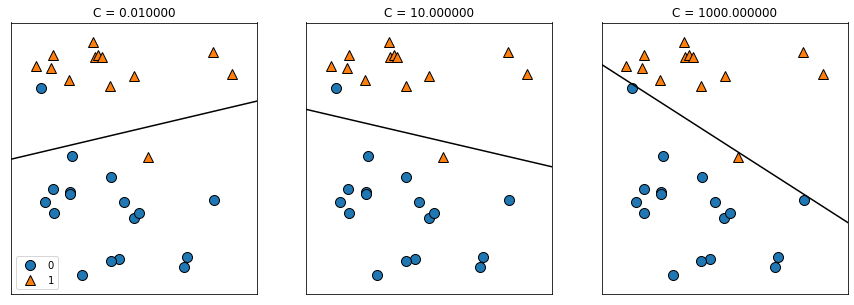

In [15]:
mglearn.plots.plot_linear_svc_regularization()

fig = plt.gcf()
fig.set_size_inches(15, 5)
plt.show()

在左侧的图中，C值很小，对应强正则化，大部分属于类别0的点都位于底部，大部分属于类别1的点都位于顶部，强正则化的模型会选择一条相对水平的线；在中间的图中，C值稍大，模型更关注两个分类错误的样本，使决策边界的斜率变大；最后，在右侧的图中，C值非常大，使得决策边界的斜率也很大，现在模型对类 别0中所有点的分类都是正确的，类别1中仍有一个点分类错误，这是因为对这个数据集来说，不可能用一条直线将所有点都分类正确。

右侧图中的模型尽量使所有点的分类都正确，但可能无法掌握类别的整体分布。换句话说，这个模型很可能过拟合。

**与回归的情况类似，用于分类的线性模型在低维空间中看起来可能非常受限，决策边界只能是直线或平面。同样，在高维空间中，用于分类的线性模型变得非常强大，当考虑更多特征时，避免过拟合变得越来越重要。**

我们在乳腺癌数据集上详细分析LogisticRegression：

In [16]:
cancer = load_breast_cancer() 
X_train, X_test, y_train, y_test = train_test_split(cancer.data, 
                                                    cancer.target, 
                                                    stratify=cancer.target, 
                                                    random_state=42)
logreg = LogisticRegression().fit(X_train, y_train) 
print("Training set score: {:.3f}".format(logreg.score(X_train, y_train))) 
print("Test set score: {:.3f}".format(logreg.score(X_test, y_test)))

Training set score: 0.953
Test set score: 0.958


/home/alex/3rd/py-venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


当C=1(默认值)的时候，在训练集和测试集上都达到95%的精度，虽然性能很好，但是由于训练集和测试集的性能非常接近，所以模型很可能是欠拟合的。我们尝试增大C来拟合一个更灵活的模型：

In [17]:
logreg100 = LogisticRegression(C=100).fit(X_train, y_train) 
print("Training set score: {:.3f}".format(logreg100.score(X_train, y_train))) 
print("Test set score: {:.3f}".format(logreg100.score(X_test, y_test)))

Training set score: 0.967
Test set score: 0.965


/home/alex/3rd/py-venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


还可以研究使用正则化更强的模型时会发生什么。设置C=0.01：

In [18]:
logreg001 = LogisticRegression(C=0.01).fit(X_train, y_train) 
print("Training set score: {:.3f}".format(logreg001.score(X_train, y_train))) 
print("Test set score: {:.3f}".format(logreg001.score(X_test, y_test)))

Training set score: 0.934
Test set score: 0.930


/home/alex/3rd/py-venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


看一下正则化参数C取三个不同的值时模型学到的系数：

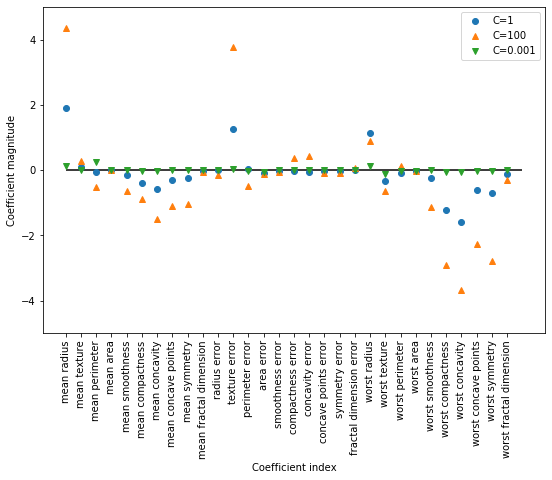

In [19]:
plt.plot(logreg.coef_.T, 'o', label="C=1") 
plt.plot(logreg100.coef_.T, '^', label="C=100") 
plt.plot(logreg001.coef_.T, 'v', label="C=0.001") 
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90) 
plt.hlines(0, 0, cancer.data.shape[1]) 
plt.ylim(-5, 5) 
plt.xlabel("Coefficient index") 
plt.ylabel("Coefficient magnitude") 
plt.legend()
plt.gcf().set_size_inches(9, 6)
plt.show()

如果想要一个可解释性更强的模型，可以使用$L_1$正则化，因为它约束模型只使用少数几个特征：

/home/alex/3rd/py-venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/alex/3rd/py-venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Training accuracy of l1 logreg with C=0.001: 0.91
Test accuracy of l1 logreg with C=0.001: 0.92


/home/alex/3rd/py-venv/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/alex/3rd/py-venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Training accuracy of l1 logreg with C=1.000: 0.96
Test accuracy of l1 logreg with C=1.000: 0.96
Training accuracy of l1 logreg with C=100.000: 0.99
Test accuracy of l1 logreg with C=100.000: 0.98


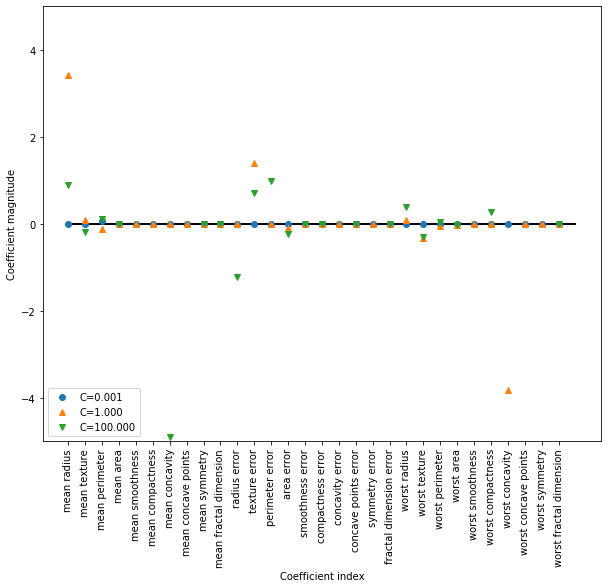

In [20]:
for C, marker in zip([0.001, 1, 100], ['o', '^', 'v']):
    lr_l1 = LogisticRegression(C=C, penalty="l1").fit(X_train, y_train) 
    print("Training accuracy of l1 logreg with C={:.3f}: {:.2f}".format(C, lr_l1.score(X_train, y_train))) 
    print("Test accuracy of l1 logreg with C={:.3f}: {:.2f}".format(C, lr_l1.score(X_test, y_test)))
    plt.plot(lr_l1.coef_.T, marker, label="C={:.3f}".format(C)) 
    plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90) 
    plt.hlines(0, 0, cancer.data.shape[1]) 

plt.xlabel("Coefficient index") 
plt.ylabel("Coefficient magnitude") 
plt.ylim(-5, 5) 
plt.legend(loc=3)
plt.gcf().set_size_inches(10, 8)
plt.show()

#### 2.3.3.6 用于多分类的线性模型
将二分类算法推广到多分类算法的一种常见方法是`一对其余`(one-vs.-rest)方法。在“一对其余”方法中，对每个类别都学习一个二分类模型，将这个类别与所有其他类别尽量分开，这样就生成了与类别个数一样多的二分类模型。在测试点上运行所有二类分类器来进行预测。在对应类别上分数最高的分类器“胜出”，将这个类别标签返回作为预测结果。

多分类Logistic回归背后的数学与“一对其余”方法稍有不同，但它也是对每个类别都有一个系数向量和一个截距，也使用了相同的预测方法。

我们将“一对其余”方法应用在一个简单的三分类数据集上：

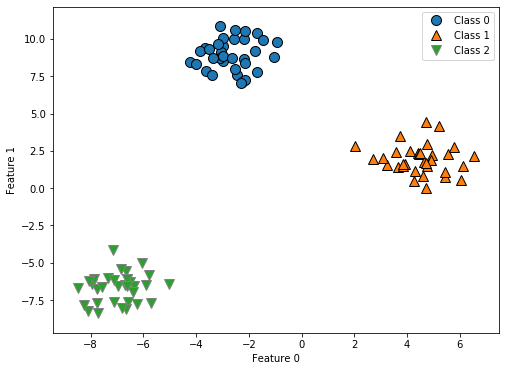

In [21]:
X, y = make_blobs(random_state=42)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y) 
plt.xlabel("Feature 0") 
plt.ylabel("Feature 1") 
plt.legend(["Class 0", "Class 1", "Class 2"])
plt.gcf().set_size_inches(8, 6)
plt.show()

训练一个LinearSVC分类器：

Coefficient shape:  (3, 2)
Intercept shape:  (3,)


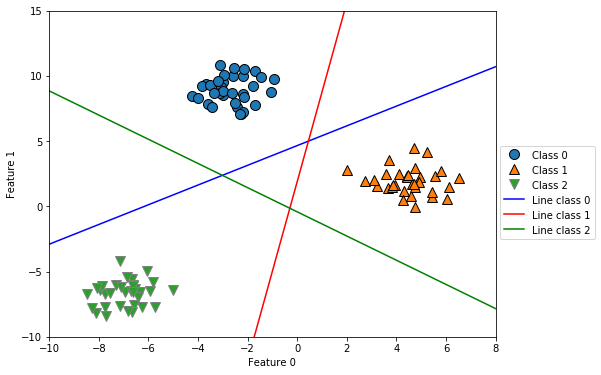

In [22]:
linear_svm = LinearSVC().fit(X, y) 

# coef_的形状是(3, 2)，说明coef_每行包含三个类别之一的系数向量，每列
# 包含某个特征(这个数据集有2个特征)对应的系数值
# intercept_是一维数组，保存每个类别的截距
print("Coefficient shape: ", linear_svm.coef_.shape) 
print("Intercept shape: ", linear_svm.intercept_.shape)

mglearn.discrete_scatter(X[:, 0], X[:, 1], y) 
line = np.linspace(-15, 15) 

for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, ['b', 'r', 'g']):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color) 

plt.ylim(-10, 15)
plt.xlim(-10, 8) 
plt.xlabel("Feature 0") 
plt.ylabel("Feature 1") 
plt.legend(['Class 0', 'Class 1', 'Class 2', 'Line class 0', 'Line class 1', 'Line class 2'], loc=(1.01, 0.3))
plt.gcf().set_size_inches(8, 6)
plt.show()

训练集中所有属于类别0的点都在与类别0对应的直线上方，这说明它们位于这个二类分类器属于“类别0”的那一侧；属于类别0的点位于与类别2对应的直线上 方，这说明它们被类别2的二类分类器划为“其余”；属于类别0的点位于与类别1对应的直线左侧，这说明类别1的二元分类器将它们划为“其余”。因此，这一区域的所有点都会被最终分类器划为类别0（类别0的分类器的分类置信方程的结果大于0， 其他两个类别对应的结果都小于0）。

但图像中间的三角形区域属于哪一个类别呢？3个二类分类器都将这一区域内的点划为“其余”。这里的点应该划归到哪一个类别呢？答案是分类方程结果最大的那个类别，即最接近的那条线对应的类别。

下面的例子给出了二维空间中所有区域的预测结果：

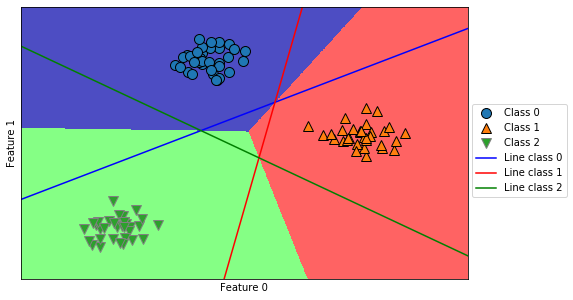

In [23]:
mglearn.plots.plot_2d_classification(linear_svm, X, fill=True, alpha=.7)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, ['b', 'r', 'g']):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
    plt.legend(['Class 0', 'Class 1', 'Class 2', 'Line class 0', 'Line class 1', 'Line class 2'], loc=(1.01, 0.3))
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.gcf().set_size_inches(8, 5)
plt.show()

#### 2.3.3.7 优点、缺点和参数
线性模型的主要参数是正则化参数，在回归模型中叫作alpha，在LinearSVC和LogisticRegression中叫作C。alpha值较大或C值较小，说明模型比较简单。特别是对于回归模型而言，调节这些参数非常重要。通常在对数尺度上对C和alpha进行搜索。你还需要确定的是用$L_1$正则化还是$L_2$正则化。如果你假定只有几个特征是真正重要的，那么你应该用$L_1$正则化，否则应默认使用$L_2$正则化。如果模型的可解释性很重要的话，使用$L_1$也会有帮助。由于$L_1$只用到几个特征，所以更容易解释哪些特征对模型是重要的，以及这些特征的作用。

线性模型的训练速度非常快，预测速度也很快。这种模型可以推广到非常大的数据集，对稀疏数据也很有效。如果你的数据包含数十万甚至上百万个样本，你可能需要研究如何使用LogisticRegression和Ridge模型的solver='sag'选项，在处理大型数据时，这一选项比默认值要更快。其他选项还有SGDClassifier类和SGDRegressor类，它们对本节介绍的线性模型实现了可扩展性更强的版本。

线性模型的另一个优点在于，利用我们之间见过的用于回归和分类的公式，理解如何进行预测是相对比较容易的。不幸的是，往往并不完全清楚系数为什么是这样的。如果你的数据集中包含高度相关的特征，这一问题尤为突出。 在这种情况下，可能很难对系数做出解释。

如果特征数量大于样本数量，线性模型的表现通常都很好。它也常用于非常大的数据集，只是因为训练其他模型并不可行。但在更低维的空间中，其他模型的泛化性能可能更好。